[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.sandbox.google.com/github/kornia/tutorials/blob/master/source/image_stitching.ipynb)

# Image stitching example with LoFTR

First, we will install everything needed:



*  fresh version of [kornia](https://github.com/kornia/kornia) for [LoFTR](https://zju3dv.github.io/loftr/)
*  fresh version of [kornia](https://github.com/kornia/kornia) for [ImageStitcher](https://kornia.readthedocs.io/en/latest/contrib.html#kornia.contrib.ImageStitcher)


In [1]:
%%capture
!pip install kornia scikit-image

Now let's download an image pair


In [2]:
%%capture
import matplotlib.pyplot as plt
import numpy as np
from skimage import io

import torch
import kornia as K
import kornia.feature as KF


def load_torch_image(fname):
    return K.image_to_tensor(io.imread(fname), False).float() / 255.

def load_images_by_link(links):
    return list([load_torch_image(fname) for fname in links])

fnames = [
    'http://www.ic.unicamp.br/~helio/imagens_registro/foto1B.jpg',
    'http://www.ic.unicamp.br/~helio/imagens_registro/foto1A.jpg',
]

imgs = load_images_by_link(fnames)

## Stitch them together

/home/edgar/software/tutorials/.venv/lib/python3.8/site-packages/kornia/feature/loftr/utils/coarse_matching.py:255: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  [i_ids % data['hw0_c'][1], i_ids // data['hw0_c'][1]],
/home/edgar/software/tutorials/.venv/lib/python3.8/site-packages/kornia/feature/loftr/utils/coarse_matching.py:258: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use

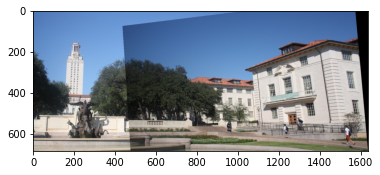

In [3]:
from kornia.contrib import ImageStitcher

IS = ImageStitcher(KF.LoFTR(pretrained='outdoor'), estimator='ransac')

with torch.no_grad():
    out = IS(*imgs)

plt.imshow(K.tensor_to_image(out))
plt.show()

## Another example

In [4]:
fnames = [
    'https://github.com/daeyun/Image-Stitching/blob/master/img/hill/1.JPG?raw=true',
    'https://github.com/daeyun/Image-Stitching/blob/master/img/hill/2.JPG?raw=true',
    'https://github.com/daeyun/Image-Stitching/blob/master/img/hill/3.JPG?raw=true',
]

imgs = load_images_by_link(fnames)

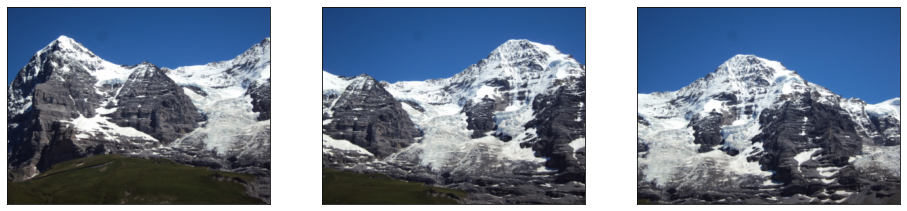

In [5]:
f, axarr = plt.subplots(1, 3, figsize = (16,6))

axarr[0].imshow(K.tensor_to_image(imgs[0]))
axarr[0].tick_params(left = False, right = False, labelleft = False, labelbottom = False, bottom = False)
axarr[1].imshow(K.tensor_to_image(imgs[1]))
axarr[1].tick_params(left = False, right = False, labelleft = False, labelbottom = False, bottom = False)
axarr[2].imshow(K.tensor_to_image(imgs[2]))
axarr[2].tick_params(left = False, right = False, labelleft = False, labelbottom = False, bottom = False)

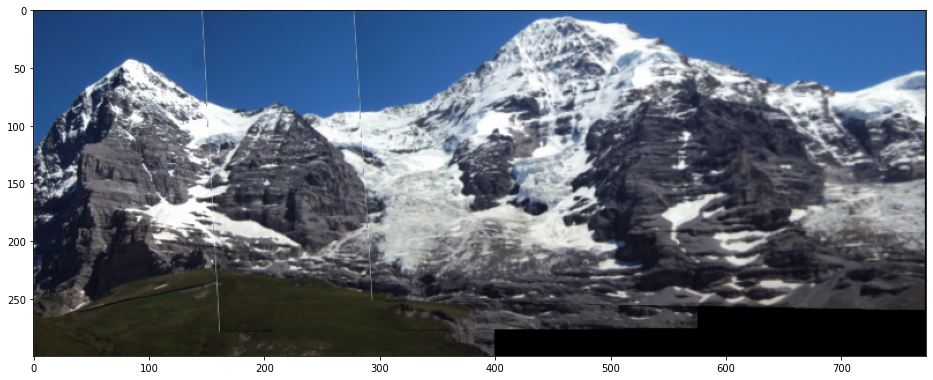

In [6]:
matcher = KF.LocalFeatureMatcher(
    KF.GFTTAffNetHardNet(100), KF.DescriptorMatcher('snn', 0.8)
)
IS = ImageStitcher(matcher, estimator='ransac')

with torch.no_grad():
    out = IS(*imgs)

plt.figure(figsize=(16, 16))
plt.imshow(K.tensor_to_image(out))